In [1]:
import csv
import datetime
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import statistics


path_CO  = os.path.join(os.getcwd(), 'data_files', 'AnalogPerformanceTest-CO.csv')
path_CI  = os.path.join(os.getcwd(), 'data_files', 'AnalogPerformanceTest-CI.csv')

path_VO  = os.path.join(os.getcwd(), 'data_files', 'AnalogPerformanceTest-VO.csv')
path_VI  = os.path.join(os.getcwd(), 'data_files', 'AnalogPerformanceTest-VI.csv')
# file_exists = os.path.isfile(path)

# data =csv.reader(open(path))
# temp = [row for row in data]
currentCO = pd.read_csv(path_CO)
currentGW = pd.read_csv(path_CI)

voltageVO = pd.read_csv(path_VO)
voltageVI = pd.read_csv(path_VI)

# print(list(currentCO.columns.values))
print(currentCO.head())

# test = pd.read_csv(path)
# print(list(test.columns.values))

   Current Gateway  Current PLC                   timestamp   test sequence
0                0     0.004273  2022-04-27T12:43:09.613350  current_output
1                0     0.010987  2022-04-27T12:43:09.705852  current_output
2                0     0.009156  2022-04-27T12:43:09.799860  current_output
3                0     0.009156  2022-04-27T12:43:10.385145  current_output
4                0     0.009766  2022-04-27T12:43:11.389768  current_output


In [2]:
def calcDeviation(x,y):
    if x > y:
        res = x-y
    else:
        res = y-x
    return res



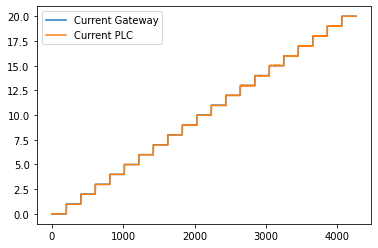

In [3]:
plt.close()
plt.plot(np.array(currentCO['Current Gateway'], dtype=np.float64), label='Current Gateway')
plt.plot(np.array(currentCO['Current PLC'], dtype=np.float64), label='Current PLC')
plt.legend()
plt.show()

# Current

In [4]:
CurrentValues=range(0,21,1)
# print(CurrentValues)
df_selection = {}
labels=['Output', 'Input']
sections=['PLC', 'GW']
for section in sections:
    df_selection[section] = {}
for i in CurrentValues:
    df_selection['PLC'][i] = currentCO[currentCO['Current Gateway']==i]
    df_selection['PLC'][i] = df_selection['PLC'][i][3:]
    df_selection['GW'][i] = currentGW[currentGW['Current PLC']==i]
    df_selection['GW'][i] = df_selection['GW'][i][3:]

num = 0
print(df_selection['GW'][num])
print(df_selection['PLC'][num])


     Current Gateway  Current PLC                   timestamp  test sequence
3                0.0          0.0  2022-04-27T11:31:21.251978  current_input
4                0.0          0.0  2022-04-27T11:31:22.263618  current_input
5                0.0          0.0  2022-04-27T11:31:23.259216  current_input
6                0.0          0.0  2022-04-27T11:31:24.255240  current_input
7                0.0          0.0  2022-04-27T11:31:25.264980  current_input
..               ...          ...                         ...            ...
195              0.0          0.0  2022-04-27T11:34:33.259765  current_input
196              0.0          0.0  2022-04-27T11:34:34.259661  current_input
197              0.0          0.0  2022-04-27T11:34:35.254732  current_input
198              0.0          0.0  2022-04-27T11:34:36.246586  current_input
199              0.0          0.0  2022-04-27T11:34:37.260509  current_input

[197 rows x 4 columns]
     Current Gateway  Current PLC                   

Mean deviation: 
 Input = 0.041679 mA
 Output = 0.009534 mA
Deviation Input 
 Max = 0.216000 mA
 Min = 0.000000 mA
Deviation Output 
 Max = 0.021179 mA
 Min = 0.000854 mA


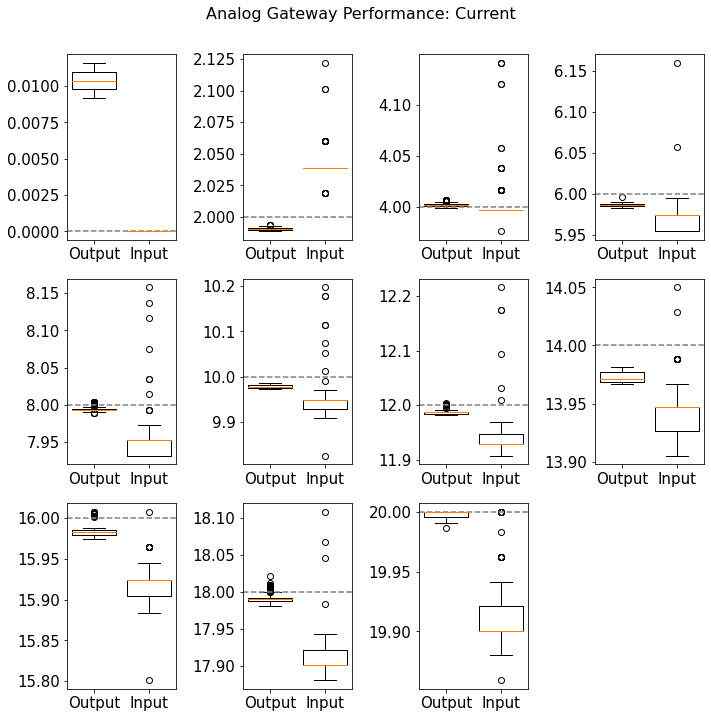

In [5]:

plt.close()
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
plt.rcParams.update({'font.size': 15})
widths=0.8

currentval = {}
currentval['minPLC'] = []
currentval['maxPLC'] = []
currentval['minGW'] = []
currentval['maxGW'] = []
meancleanout=[]
meancleanin=[]



for n, current in enumerate(range(0,21,2)):
    
    ax = plt.subplot(3,4, n + 1)
   
    ax.boxplot([df_selection['PLC'][current]['Current PLC'].astype(float), 
                df_selection['GW'][current]['Current Gateway'].astype(float)],
                    labels=labels, widths=widths)
    ax.axhline(y=current, color='grey', linestyle='dashed')

    currentval[current]= {}
    currentval['maxPLC'].append(calcDeviation(df_selection['PLC'][current]['Current PLC'].max(),current))
    currentval['minPLC'].append(calcDeviation(df_selection['PLC'][current]['Current PLC'].min(),current))
    currentval['maxGW'].append(calcDeviation(df_selection['GW'][current]['Current Gateway'].max(),current))
    currentval['minGW'].append(calcDeviation(df_selection['GW'][current]['Current Gateway'].min(),current))

    currentval[current]['min'] = df_selection['PLC'][current]['Current PLC'].min()
    currentval[current]['max'] = df_selection['PLC'][current]['Current PLC'].max()
    currentval[current]['mean'] = df_selection['PLC'][current]['Current PLC'].mean()
    currentval[current]['meancleanOut'] = current - df_selection['PLC'][current]['Current PLC'].mean()
    currentval[current]['meancleanIn'] = current - df_selection['GW'][current]['Current Gateway'].mean()
    meancleanout.append(currentval[current]['meancleanOut'])
    meancleanin.append(currentval[current]['meancleanIn'])
 


    


plt.suptitle("Analog Gateway Performance: Current",fontsize=16, y=1)
plt.tight_layout()
plt.savefig('Analog_Performance_Test-Current.pdf',
            dpi=200)

# print(meancleanout)
meandeviationIn = statistics.mean(meancleanin)
meandeviationOut = statistics.mean(meancleanout)
print('Mean deviation: \n Input = %f mA\n Output = %f mA' %(meandeviationIn, meandeviationOut) )
print('Deviation Input \n Max = %f mA\n Min = %f mA' %(np.max(currentval['maxGW']), np.min(currentval['minGW'])))
print('Deviation Output \n Max = %f mA\n Min = %f mA'%(np.max(currentval['maxPLC']), np.min(currentval['minPLC'])))

# Voltage

In [6]:
VoltageValues=np.arange(0,11,1)
# print(VoltageValues)
df_selection = {}
for section in sections:
    df_selection[section] = {}
for i in VoltageValues:
    df_selection['PLC'][i] = voltageVO[voltageVO['Voltage Gateway']==i]
    df_selection['PLC'][i] =df_selection['PLC'][i][5:-5]
    df_selection['GW'][i] = voltageVI[voltageVI['Voltage PLC']==i]
    df_selection['GW'][i] =df_selection['GW'][i][5:-5]

num = 1
print(df_selection['PLC'][num])
print(df_selection['GW'][num])

     Voltage Gateway  Voltage PLC                   timestamp   test sequence
411              1.0     0.972930  2022-05-10T15:33:34.562779  voltage_output
412              1.0     0.972320  2022-05-10T15:33:35.593005  voltage_output
413              1.0     0.973540  2022-05-10T15:33:36.545002  voltage_output
414              1.0     0.975677  2022-05-10T15:33:37.649304  voltage_output
415              1.0     0.972015  2022-05-10T15:33:38.552662  voltage_output
..               ...          ...                         ...             ...
598              1.0     0.973540  2022-05-10T15:36:41.667271  voltage_output
599              1.0     0.972930  2022-05-10T15:36:42.550602  voltage_output
600              1.0     0.973540  2022-05-10T15:36:43.603392  voltage_output
601              1.0     0.973235  2022-05-10T15:36:44.763900  voltage_output
602              1.0     0.974151  2022-05-10T15:36:45.663396  voltage_output

[192 rows x 4 columns]
     Voltage Gateway  Voltage PLC       

Mean deviation: 
 Input = 0.015709 V
 Output = 0.028861 V
Deviation Input 
 Max = 0.107000 V
 Min = 0.000000 V
Deviation Output 
 Max = 0.038301 V
 Min = 0.013123 V


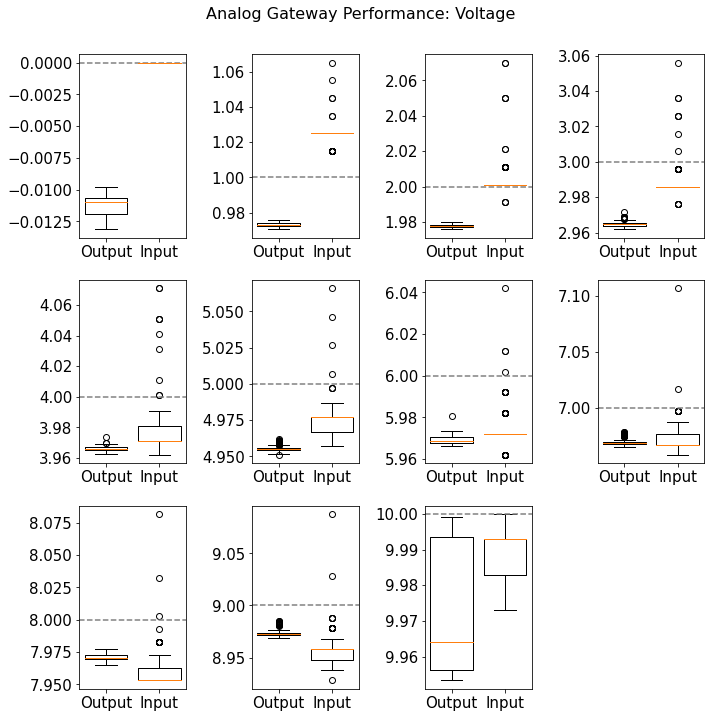

In [7]:
plt.close()

plt.figure(figsize=(10, 10))
# plt.subplots_adjust(hspace=0.2, wspace=0.45)
plt.rcParams.update({'font.size': 15})
widths=0.8

voltageval={}
voltageval['minPLC'] = []
voltageval['maxPLC'] = []
voltageval['minGW'] = []
voltageval['maxGW'] = []
meancleanout=[]
meancleanin=[]

for n, voltage in enumerate(VoltageValues):
    
    ax = plt.subplot(3,4, n + 1)
   
    ax.boxplot([df_selection['PLC'][voltage]['Voltage PLC'].astype(float), 
                df_selection['GW'][voltage]['Voltage Gateway'].astype(float)],
                    labels=labels, widths=widths)
    ax.axhline(y=voltage, color='grey', linestyle='dashed')

    voltageval[voltage] = {}
    voltageval['maxPLC'].append(calcDeviation(df_selection['PLC'][voltage]['Voltage PLC'].max(),voltage))
    voltageval['minPLC'].append(calcDeviation(df_selection['PLC'][voltage]['Voltage PLC'].min(),voltage))
    voltageval['maxGW'].append(calcDeviation(df_selection['GW'][voltage]['Voltage Gateway'].max(),voltage))
    voltageval['minGW'].append(calcDeviation(df_selection['GW'][voltage]['Voltage Gateway'].min(),voltage))

    voltageval[voltage]['meancleanOut'] = voltage - df_selection['PLC'][voltage]['Voltage PLC'].mean()
    voltageval[voltage]['meancleanIn'] = voltage - df_selection['GW'][voltage]['Voltage Gateway'].mean()
    meancleanout.append(voltageval[voltage]['meancleanOut'])
    meancleanin.append(voltageval[voltage]['meancleanIn'])
    

plt.suptitle("Analog Gateway Performance: Voltage", fontsize=16, y=1)
plt.tight_layout()
plt.savefig('Analog_Performance_Test-Voltage.pdf',
            dpi=200)

meandeviationIn = statistics.mean(meancleanin)
meandeviationOut = statistics.mean(meancleanout)
print('Mean deviation: \n Input = %f V\n Output = %f V' %(meandeviationIn, meandeviationOut) ) 
print('Deviation Input \n Max = %f V\n Min = %f V' %(np.max(voltageval['maxGW']), np.min(voltageval['minGW'])))
print('Deviation Output \n Max = %f V\n Min = %f V'%(np.max(voltageval['maxPLC']), np.min(voltageval['minPLC'])))
